Name: Aparna Iyer

PRN: 22070126017

Branch: AI-ML

Batch: 2022-2026, A1

Import necessary software libraries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_action_values, test_agent
np.object = object

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Initialize the environment.

In [5]:
env = Maze() #Instantiating Maze, env is an instance of the class Maze

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


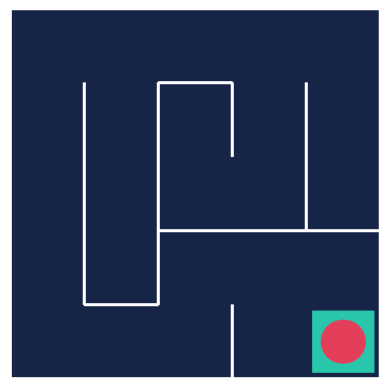

In [6]:
frame = env.render(mode='rgb_array') #Render the Maze Environment as a frame
plt.axis('off')
plt.imshow(frame)

Print Observations

In [7]:
print(f"Observation Space shape: {env.observation_space.nvec}") #Print the dimensions of the Observation Space
print(f"Number of actions: {env.action_space.n}") #Print the number of actions

Observation Space shape: [5 5]
Number of actions: 4


###Define Value Table, Q(s,a).

Q Value: Q(s,a): Quality of a State-Action Pair.

Create the Q(s,a) Table.

In [8]:
action_values = np.zeros(shape=(5,5,4)) #4 actions- 4 matrices of 5x5 size (4: Number of layers)

Plot Q(s,a).

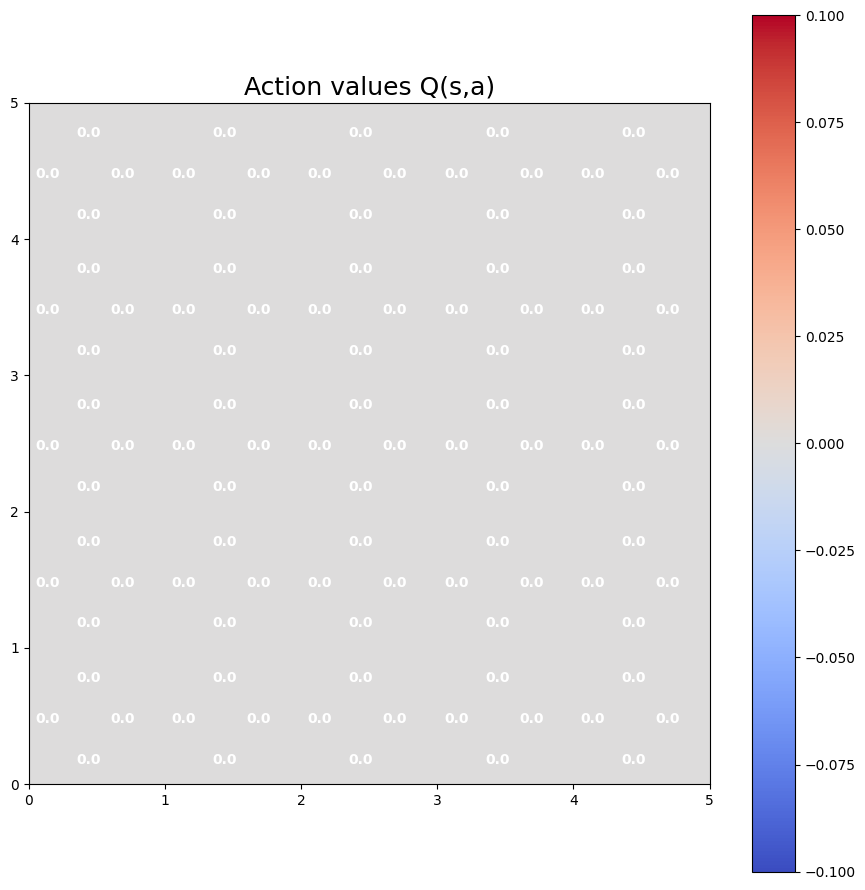

In [10]:
plot_action_values(action_values) #Plot the Action-Value Function of each state-action pair

###Define the policy, pi(s).

In [11]:
def policy(state, epsilon=0.):

  #Epsilon: Exploration-Exploitation Factor, between 0 and 1.
  #Exploitation: Greedy Approach
  #Exploration: To find (multiple ways/episodes.)

  if np.random.random() < epsilon: #Random Number Generated

    return np.random.randint(4) #Integral Values only

  else:

    av = action_values[state]    #The actions corresponding to the provided state.

    return np.random.choice(np.flatnonzero(av == av.max())) #The action corresponding to the highest value is returned.

###Test the policy with state (0,0).

In [12]:
action = policy((0,0),0.2)

print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 0


###Plot the Policy.

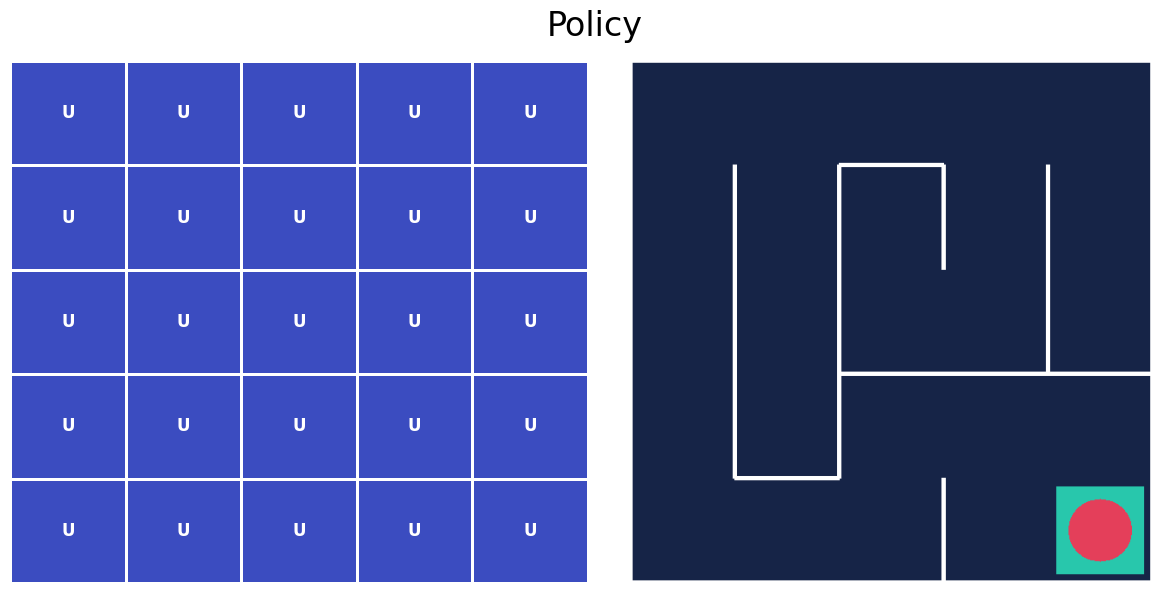

In [13]:
plot_policy(action_values, frame)  #u: Up, d: Down, l: Left, r:right

In [14]:
#On-Policy Monte Carlo Control

#On-Policy: Start from scratch, then iteratively refine.

def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):

  sa_returns = {} #Initialize a dictionary of key-value pairs, where the key is  and the value is the corresponding Q-Value.

  for episode in range(1,episodes+1):

    state = env.reset()
    done=False  #Set done to False
    transitions = [] #Initialize a list to store the transitions.

    while not done:

      action = policy(state,epsilon) #Sample an action from the Action Space.
      next_state, reward, done, _ = env.step(action) #A tuple of next_state, reward, done (True or False), additional information.
      transitions.append((state,action,reward)) #Append tuples of (state,action,reward) to the list, transitions.
      state = next_state

    G=0 #Initialize G, return to 0.

    for state_t,action_t,reward_t in reversed(transitions):
      G= reward_t + gamma * G #Bellman Equation, gamma: Discount Factor = 0.99.

      if not(state_t, action_t) in sa_returns:
        sa_returns[(state_t,action_t)] = [] #The key of dictionary sa_returns is a state-action tuple.
        #The value corresponding to the key (S,A),is initialized to a list.

        sa_returns[(state_t,action_t)].append(G) #To the list that is the value in sa_returns corresponding to state-action tuple (s,a), the return G is appended in every iteration

        action_values[state_t][action_t] = np.mean(sa_returns[(state_t,action_t)])



In [15]:
on_policy_mc_control(policy,action_values,episodes=1000)

###Show Results

Show the resulting table Q(s,a).


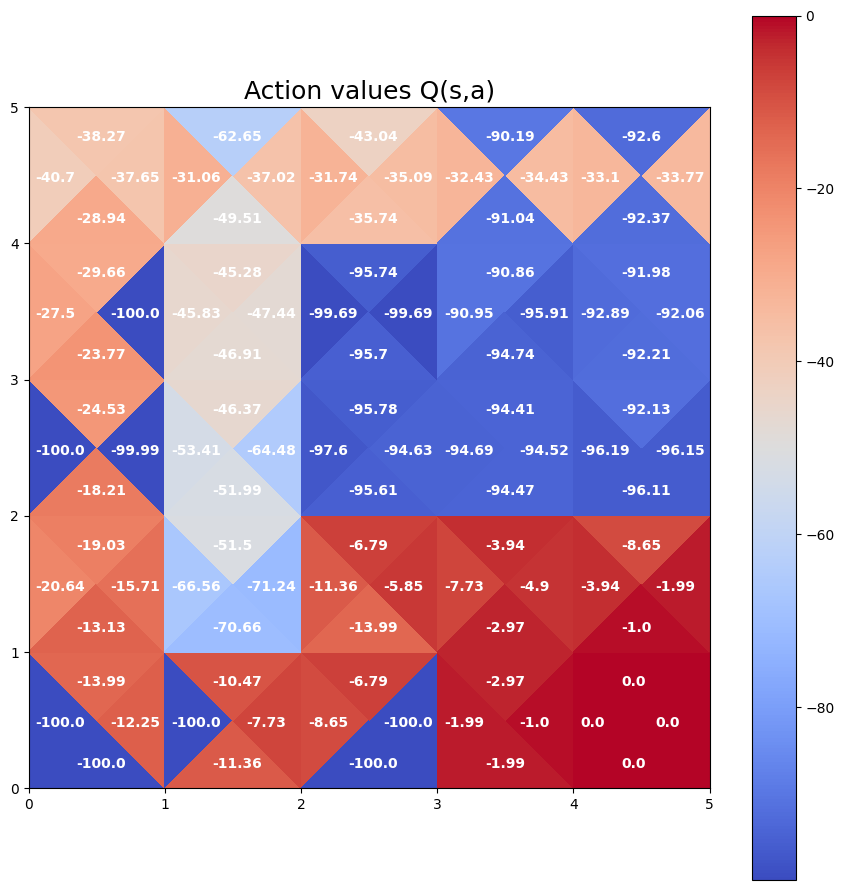

In [16]:
plot_action_values(action_values)

###Show resulting policy pi(.|s).

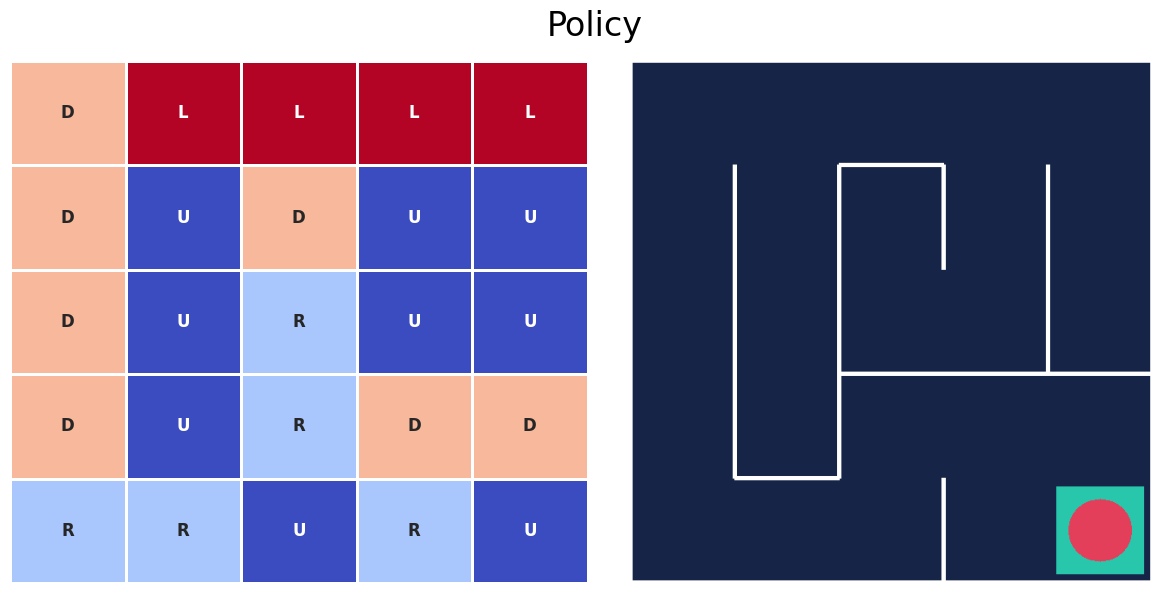

In [17]:
plot_policy(action_values, frame) #Plotting the policy (L,R,U,D)

###Test the Resulting Agent.

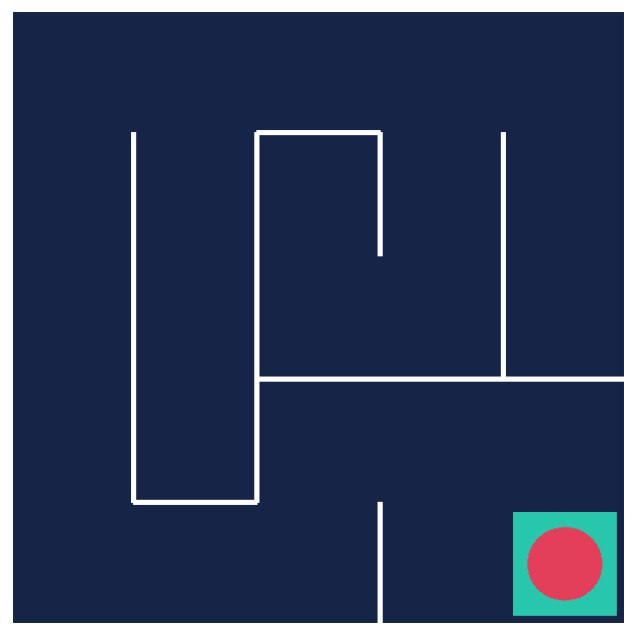

In [18]:
test_agent(env,policy,episodes=5) #On varying the number of episodes, performance will change.